In [13]:
# Author: Nathaniel Ruhl
# This is a one-dimensional kalman filter for the 50% altitude measurement, written in terms of the predict and update
# phases of a Bayesian filter.

# Code to help find the normalization factor for K_normalized()
import sympy as sp
sigma, pi, x, mu = sp.symbols("sigma, pi, x, mu")
K = x*sp.exp(-(x-mu)**2/(2*sigma**2))
print(sp.solve(sp.diff(K,x),x))

# create random arrays of alpha and SN
import numpy as np

def y50(alpha, SN):
    return 6496.949-0.0078*SN-6.430*alpha

sensor_var = 0.2   # varience of the measurement
std_adm = 1.37    # km
error_noise = 0.5   # km, extra error in a navigational scenario
measurement_noise = (std_adm+error_noise)*np.random.randn(100)

alpha_list = 2*np.pi*np.random.rand(100)
SN_list = 350*np.random.rand(100)

zs = y50(alpha_list, SN_list) + measurement_noise   # y50_measured

# x is the innovation and z is the measurement
def K_normalized(x):
    mean = 0.5*std_adm
    var = std_adm**2
    N = K(mean/2 + np.sqrt(mean**2 + 4*var)/2)  # normalization coeff
    return (1/N)*(x/np.sqrt(2*np.pi*var))*np.exp(-(x-mean)**2/(2*var))

# Kalman gain for a given measurement innovation, x
def K(x):
    mean = 0.5*std_adm
    var = std_adm**2
    return (x/np.sqrt(2*np.pi*var))*np.exp(-(x-mean)**2/(2*var))

y50_prediction = []
y50_estimate = []

for i in range(100):
    prior = y50(alpha_list[i], SN_list[i])
    kalman_gain = K_normalized(abs(zs[i]-prior))
    posterior = prior + kalman_gain*(zs[i]-prior)
    y50_prediction.append(prior)
    y50_estimate.append(posterior)
    
y50_prediction = np.array(y50_prediction)
y50_estimates = np.array(y50_estimate)

[mu/2 - sqrt(mu**2 + 4*sigma**2)/2, mu/2 + sqrt(mu**2 + 4*sigma**2)/2]


(0.0, 5.0)

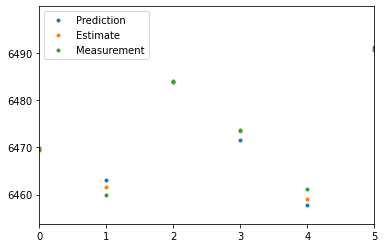

In [14]:
import matplotlib.pyplot as plt
plt.plot(y50_prediction,'.', label="Prediction")
plt.plot(y50_estimate, ".", label="Estimate")
plt.plot(zs, '.', label="Measurement")
plt.legend()
plt.xlim(([0,5]))

Text(0.5, 0, 'abs(measurement noise)')

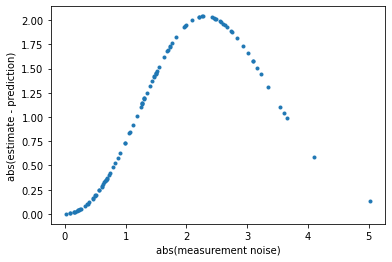

In [15]:
plt.plot(abs(measurement_noise), abs(y50_estimate-y50_prediction), '.')
plt.ylabel("abs(estimate - prediction)")
plt.xlabel("abs(measurement noise)")

Text(0, 0.5, 'Measurement Gain')

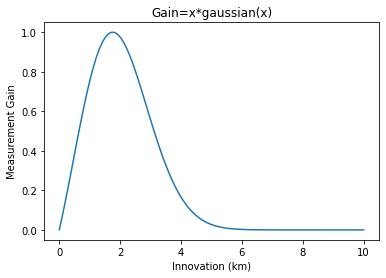

In [16]:
x=np.linspace(0,10,100)
plt.plot(x,K_normalized(x))
plt.title('Gain=x*gaussian(x)')
plt.xlabel("Innovation (km)")
plt.ylabel("Measurement Gain")